### Getting Started w ConvNets 🥲🤓

In [ ]:
### But first a little pytorch intro / basics refresher bc it is slightly different than python and this and tensorflow and keras will be the main
### frameworks wel be using for deep learning!

In [ ]:
import math, numpy, torch
from matplotlib import pyplot as plt

### making the vector of 101 equally spaced from 0 to 5

x = torch.linspace(0, 5, 101)

### Print the first 5 things in x

print(x[:5])

tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000])


### A little bit on `torch.linspace` we initialized - it is a tensor of size `steps` whose values are evenly spaced from `start` to `end` values are calculated s.t

![image.png](data:image/png;base64,)

In [ ]:
## Printing the last 5 things in x (instead of the first five )

print(x[-5:])

tensor([4.8000, 4.8500, 4.9000, 4.9500, 5.0000])


The shape of x is torch.Size([101])
The shape of y1=x.sin() is  torch.Size([101])
The shape of y2 =x ** x.cos() is  torch.Size([101])
The shape of y3=y2 - y1 is torch.Size([101])
The shape of y4=y3.min() is torch.Size([]), a zero-d scalar


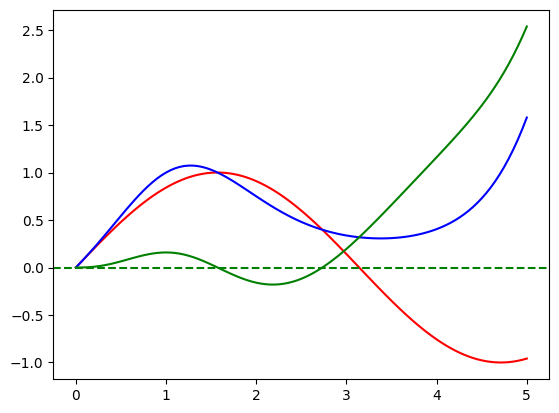

In [ ]:
### Doing some vector computations

y1, y2 = x.sin(), x**x.cos()
y3 = y2 - y1
y4 = y3.min()

print(f'The shape of x is {x.shape}')
print(f'The shape of y1=x.sin() is  {y1.shape}')
print(f'The shape of y2 =x ** x.cos() is  {y2.shape}')
print(f'The shape of y3=y2 - y1 is {y3.shape}')
print(f'The shape of y4=y3.min() is {y4.shape}, a zero-d scalar')

plt.plot(x, y1, 'red', x, y2, 'blue', x, y3, 'green')
plt.axhline(0, color='green', linestyle='--')
plt.show()


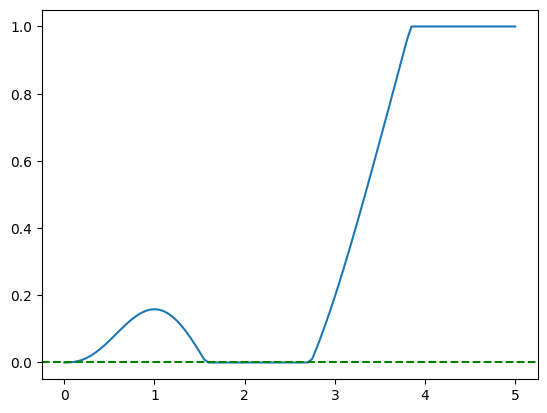

In [ ]:
## Exercise - plot y3 clamped between 0.0 and 1.0

plt.plot(x, y3.clamp(0, 1))
plt.axhline(0, color='green', linestyle='--')
plt.show()

#### Pytorch code is full of multidim arrays - the key to reading this kind of code is stopping to think about the sometimes tangled) multiple array subscripts

####  Unsqueezing to add a dimension and broadcasting - single int subscript `x[0] ` eliminates a dimension the special subscript `x[None]` does the reverse and adds an extra dimension of size one

#### Pytorch (just like np) can conbine different shaped arrays as long as the shapes appear only on 1dim of size 1 by broadcasting the singleton dimensions


#### Theres also quite a bit of fancy indexing that follows from np
#### link below for more info https://numpy.org/doc/stable/user/basics.indexing.html

### broadcasting visually explained
![image.png](data:image/png;base64)

### basically we are 'broadcasting' or 'filling in' the gaps of given
### tensor(s) or array(s) and then doing elementwise row opperations

m is tensor([[1.8543, 0.0459, 0.6016, 0.4398, 0.0289],
        [0.2926, 2.7137, 0.5350, 0.7955, 0.7101]]), and m[1,2] is 0.5350313782691956

column zero, m[:,0] is tensor([1.8543, 0.2926])
row zero, m[0,:] is tensor([1.8543, 0.0459, 0.6016, 0.4398, 0.0289])

dot product of rows (m[0,:] * m[1,:]).sum() is 1.3593811988830566

The outer product of rows m[0,:][None,:] * m[1,:][:,None] is:
tensor([[0.5425, 0.0134, 0.1760, 0.1287, 0.0085],
        [5.0320, 0.1246, 1.6327, 1.1934, 0.0784],
        [0.9921, 0.0246, 0.3219, 0.2353, 0.0155],
        [1.4751, 0.0365, 0.4786, 0.3498, 0.0230],
        [1.3167, 0.0326, 0.4272, 0.3123, 0.0205]])


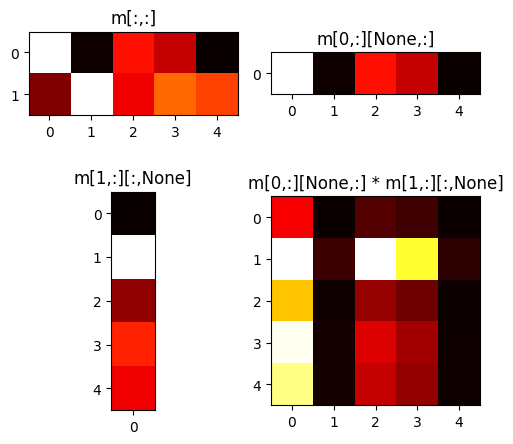

In [ ]:
import torch
from matplotlib import pyplot as plt

### make an array of normally distribuited randoms

m = torch.randn(2, 5).abs()
print(f'm is {m}, and m[1,2] is {m[1,2]}\n')
print(f'column zero, m[:,0] is {m[:,0]}')
print(f'row zero, m[0,:] is {m[0,:]}\n')

dot_product = (m[0,:] * m[1,:]).sum()
print(f'dot product of rows (m[0,:] * m[1,:]).sum() is {dot_product}\n')

outer_product = m[0,:][None,:] * m[1,:][:,None]

print(f'The outer product of rows m[0,:][None,:] * m[1,:][:,None] is:\n{outer_product}')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5, 5), dpi=100)
def color_mat(ax, m, title):
    ax.set_title(title)
    ax.imshow(m, cmap='hot', vmax=1.5, interpolation='nearest')
    ax.get_xaxis().set_ticks(range(m.shape[1]))
    ax.get_yaxis().set_ticks(range(m.shape[0]))
color_mat(ax1, m, 'm[:,:]')
color_mat(ax2, m[0,:][None,:], 'm[0,:][None,:]')
color_mat(ax3, m[1,:][:,None], 'm[1,:][:,None]')
color_mat(ax4, outer_product, 'm[0,:][None,:] * m[1,:][:,None]')
fig.tight_layout()
fig.show()


In [ ]:
### Exercise use torch.mm to compute outer_product and dot_product
import torch
from matplotlib import pyplot as plt

## torch outer
v1 = torch.arange(1., 5.)
v2 = torch.arange(1., 4.)

torch.outer(v1, v2)  ## matrix of size m x n

tensor([[ 1.,  2.,  3.],
        [ 2.,  4.,  6.],
        [ 3.,  6.,  9.],
        [ 4.,  8., 12.]])

In [ ]:
import torch
torch.dot(torch.tensor([2, 3]), torch.tensor([2, 1])) ### unlike np dot, torch.dot only supports computing dot prod of two 1D tensors w same no. of elements

tensor(7)

### A big advantage of using pytorch over np is that pytorch can do computations on  the GPU. Since moving data on and off GPU is $$ pytorch treats tensors 'computing device' as pseudo - type that requires explicit declaration and conversion. ... more info on the 'devices and types' section of the tutorial itself :> https://nbviewer.org/github/davidbau/how-to-read-pytorch/blob/master/notebooks/1-Pytorch-Introduction.ipynb

time using CPU alone: 11.8 seconds
time using GPU and CPU: 15.1 seconds
time using GPU and CPU on pinned CPU memory: 0.47 seconds
time using GPU alone: 0.159 seconds


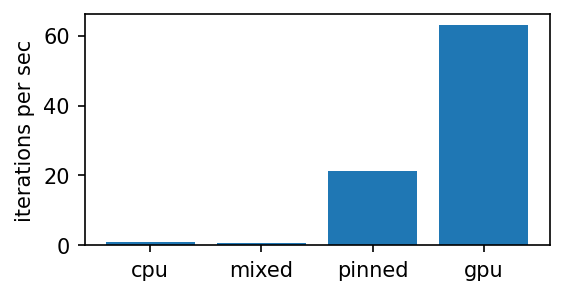

Your GPU is 74.3x faster than CPU but only 0.782x if data is repeatedly copied from the CPU
When copying from pinned memory, speedup is 25.2x
Numerical differences between GPU and CPU: 6.092341209296137e-07


In [ ]:
import torch, time
from matplotlib import pyplot as plt

### A demo of moving data b/w GPU and CPU
### Were gonna multiply a batch of vectors through a big linear operation 10 times
r = torch.randn(1024, 1024, dtype=torch.float)
x = torch.randn(32768, 1024, dtype=r.dtype)

iterations = 10

def time_iterated_mm(x, matrix):
  start = time.time()
  result = 0
  for i in range(iterations):
    result += torch.mm(matrix, x.to(matrix.device).t())
  torch.cuda.synchronize()
  elapsed = time.time() - start
  return elapsed, result.cpu()

cpu_time, cpu_result = time_iterated_mm(x.cpu(), r)
print(f'time using CPU alone: {cpu_time:.3g} seconds')

mixed_time, mixed_result = time_iterated_mm(x.cpu(), r.cpu())
print(f'time using GPU and CPU: {mixed_time:.3g} seconds')

pinned_time, pinner_result = time_iterated_mm(x.cpu().pin_memory(), r.cuda())
print(f'''time using GPU and CPU on pinned CPU memory: {pinned_time:.3g} seconds''')

gpu_time, gpu_result = time_iterated_mm(x.cuda(), r.cuda())
print(f'time using GPU alone: {gpu_time:.3g} seconds')

plt.figure(figsize=(4,2), dpi=150)
plt.ylabel('iterations per sec')
plt.bar(['cpu', 'mixed', 'pinned', 'gpu'],
        [iterations/cpu_time,
         iterations/mixed_time,
         iterations/pinned_time,
         iterations/gpu_time])
plt.show()

print(f'Your GPU is {cpu_time / gpu_time:.3g}x faster than CPU'
      f' but only {cpu_time / mixed_time:.3g}x if data is repeatedly copied from the CPU')
print(f'When copying from pinned memory, speedup is {cpu_time / pinned_time:.3g}x')
print(f'Numerical differences between GPU and CPU: {(cpu_result - gpu_result).norm() / cpu_result.norm()}')


In [ ]:
!nvidia-smi

Fri Jul 12 14:45:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

time using CPU alone: 19.3 seconds
time using GPU and CPU: 19.8 seconds
time using GPU and CPU on pinned CPU memory: 3.29 seconds
time using GPU alone: 2.95 seconds


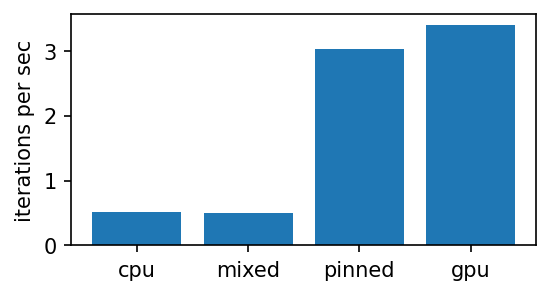

Your GPU is 6.54x faster than CPU but only 0.972x if data is repeatedly copied from the CPU
When copying from pinned memory, speedup is 5.85x
Numerical differences between GPU and CPU: 1.1356589021319005e-15


In [ ]:
### Exercise - repeat the benchmark using torch double -

import torch, time
from matplotlib import pyplot as plt

### A demo of moving data b/w GPU and CPU
### Were gonna multiply a batch of vectors through a big linear operation 10 times

dtype = torch.double

r = torch.randn(1024, 1024, dtype=dtype)
x = torch.randn(32768, 1024, dtype=r.dtype)

iterations = 10

def time_iterated_mm(x, matrix):
  start = time.time()
  result = 0
  for i in range(iterations):
    result += torch.mm(matrix, x.to(matrix.device).t())
  torch.cuda.synchronize()
  elapsed = time.time() - start
  return elapsed, result.cpu()

cpu_time, cpu_result = time_iterated_mm(x.cpu(), r)
print(f'time using CPU alone: {cpu_time:.3g} seconds')

mixed_time, mixed_result = time_iterated_mm(x.cpu(), r.cpu())
print(f'time using GPU and CPU: {mixed_time:.3g} seconds')

pinned_time, pinner_result = time_iterated_mm(x.cpu().pin_memory(), r.cuda())
print(f'''time using GPU and CPU on pinned CPU memory: {pinned_time:.3g} seconds''')

gpu_time, gpu_result = time_iterated_mm(x.cuda(), r.cuda())
print(f'time using GPU alone: {gpu_time:.3g} seconds')

plt.figure(figsize=(4,2), dpi=150)
plt.ylabel('iterations per sec')
plt.bar(['cpu', 'mixed', 'pinned', 'gpu'],
        [iterations/cpu_time,
         iterations/mixed_time,
         iterations/pinned_time,
         iterations/gpu_time])
plt.show()

print(f'Your GPU is {cpu_time / gpu_time:.3g}x faster than CPU'
      f' but only {cpu_time / mixed_time:.3g}x if data is repeatedly copied from the CPU')
print(f'When copying from pinned memory, speedup is {cpu_time / pinned_time:.3g}x')
print(f'Numerical differences between GPU and CPU: {(cpu_result - gpu_result).norm() / cpu_result.norm()}')

### W/ o looking into it much I can see why it was adviced to just stick to floats, as using double the performance iof GPUs compared to CPUs is much less obvious

### Multidim Data conventions in Pytorch

- Dimension 0 is used to index separate images within a batch.
- Dimension 1 indexes channels within an image representation (e.g., 0,1,2 = R,G,B, or more dims for more channels).
- Dimension 2 (if present) indexes the row position (y-value, starting from the top)
- Dimension 3 (if present) indexes the column position (x-value, starting from the left)

### Separate tensors can be put together into a single batch tensor using `torch.cat([a, b, c])` or `torch.stack([a, b, c])`

### Where cat doesn't add any new dimensions but just concats along the existing 0th dimension. stack adds a new 0th dimension for the batch

In [ ]:
### Exercise -

#### Use torch.randn to create a 4-dim tensor x of size (2, 3, 4, 5)
####  which could store two 5x4 RGB images


### Then print the following
#### - `x`
#### - `x.permute` to switch the hor and vetical dims
#### - `x.view` to see each image as a flat vector of 60 nums
import torch
x= torch.randn((2, 3, 4, 5))
print(x)

print(f'Switching horizontal and vertical dimensions : {x.permute(0, 3, 1, 2)}')
print(f' flattening images into vector of 60 nums: {x.view(2, 3, -1)}')

tensor([[[[ 0.8360,  1.2472, -0.6532,  0.6004, -0.5666],
          [-0.4908,  1.1516,  0.5187,  0.0562, -1.4261],
          [ 1.5723, -0.1462, -0.2419,  0.3886,  0.2329],
          [-0.2075, -0.6753,  1.1731, -0.4779, -0.2466]],

         [[-0.2337,  0.2927,  0.5608,  1.9579,  1.9228],
          [ 0.3828, -0.3789,  1.3074,  0.1809, -1.9740],
          [ 0.8284, -0.6067, -0.5210, -0.1289, -0.3513],
          [ 0.1858,  0.3340, -1.5886, -1.2357, -1.6333]],

         [[-0.9430, -0.1035,  1.0944,  0.3950,  0.3252],
          [-2.3186, -0.6604, -2.1480,  0.4100, -0.1113],
          [-0.7543, -0.7998,  0.0818,  0.7339,  0.2215],
          [-0.4312,  1.0060,  2.0912,  0.2919,  0.4741]]],


        [[[-0.5022, -1.4026,  0.0862,  0.7699,  1.4534],
          [ 0.5694, -0.8345,  1.1633, -0.5613,  0.0843],
          [ 0.2698,  0.0090, -0.8529, -0.7056,  0.8387],
          [ 0.8048, -0.8475,  0.1094,  1.3045,  0.7456]],

         [[-0.7557, -1.2701, -0.6241,  0.4141, -0.0979],
          [ 0.1896,  

### Keeping tensor dim straight in matrix mult can be confusing so einstein notation is used for good practice -
#### `i, j -> ij` may be written as the outer product

#### whereas matrix mult may be written as `ij, jk -> ik`

#### In pytorch einstein notation is av as `einsum`

In [ ]:
A = torch.randn(2,5)
B = torch.randn(5, 3)

print(torch.mm(A, B))
print(torch.einsum('ij, jk -> ik', A, B))

tensor([[-1.7072, -1.3158,  3.6394],
        [-2.2236, -0.7453,  1.1752]])
tensor([[-1.7072, -1.3158,  3.6394],
        [-2.2236, -0.7453,  1.1752]])


In [ ]:
### Exercise - Use einsum to compute a covariance stat over vectors A and B
A = torch.randn(5, 6, 2)
B = torch.randn(5, 6, 3)

covariance = torch.einsum('ijk, ijl -> ijkl', A, B)
print(covariance)

tensor([[[[ 8.1539e-02, -8.7344e-01, -1.1949e+00],
          [-9.0944e-03,  9.7419e-02,  1.3327e-01]],

         [[ 5.9189e-01,  6.8701e-01, -1.7539e-01],
          [ 6.2883e-01,  7.2989e-01, -1.8634e-01]],

         [[ 6.6516e-03,  6.2637e-03,  3.7445e-02],
          [ 2.0221e-02,  1.9042e-02,  1.1383e-01]],

         [[-6.3615e-02,  1.3050e-02, -3.5159e-01],
          [ 3.5256e-02, -7.2328e-03,  1.9486e-01]],

         [[ 1.3210e-01,  7.3718e-02, -1.0143e-02],
          [ 5.0815e-01,  2.8356e-01, -3.9016e-02]],

         [[ 1.2897e-01, -4.8879e-01, -1.1359e+00],
          [ 2.9615e-01, -1.1224e+00, -2.6084e+00]]],


        [[[ 3.7795e-01,  1.6219e-01,  1.2755e-01],
          [ 9.4447e-01,  4.0530e-01,  3.1873e-01]],

         [[-1.8146e-01, -1.2708e-01, -6.5496e-03],
          [-5.4410e-01, -3.8104e-01, -1.9639e-02]],

         [[ 4.0422e-01, -4.8666e-01,  8.0252e-02],
          [ 1.7661e+00, -2.1263e+00,  3.5064e-01]],

         [[-6.6445e-02, -6.5828e-02, -1.1732e-01],
          [

### Autograd 😊

###   w the help of `x.requires_grad` pytorch can figure out derivatives of any scalar w.r.t changes in `x` component.

In [ ]:
import torch
from matplotlib import pyplot as plt

x = torch.linspace(0, 5, 100,
                   required_grad=True)
y = (x**2).cos()
s = y.sum()
[dydx] = torch.autograd.grad(s, [x])

plt.plot(x.detach(), y.detach(), label='y')
plt.plot(x.detach(), dydx, label='dy/dx')
plt.legend()
plt.show()

TypeError: linspace() received an invalid combination of arguments - got (int, int, int, required_grad=bool), but expected one of:
 * (Tensor start, Tensor end, int steps, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Tensor end, int steps, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Tensor start, Number end, int steps, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Number end, int steps, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
